# Traffic Signs Recognition

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from PIL import Image
import cv2
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
#from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Activation, Dense, Dropout, Conv2D, MaxPooling2D, ZeroPadding2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import warnings
import glob

!pip install pydot
!pip install pydot_ng
!pip install graphviz
!pip install plot_model
import pydot
import pydot_ng
import graphviz
from plot_model import plot_model

from sklearn.metrics import accuracy_score
import pandas as pd

warnings.filterwarnings('ignore')

### Exploring dataset

##### Save all filenames and labels in a list

In [39]:
data1 = []
labels1 = []
all_classes = 43
cur_path = os.getcwd()
path_to_files = []
print(cur_path)

/Users/test/Documents/Projecten/Project verkeersborden


In [44]:
for i in range(all_classes):
    path_to_files.append(os.path.join(cur_path, "archive", "Train", str(i)))
    ext = ('.png')
    for path in path_to_files:
        with os.scandir(path) as itr:
            for entry in itr:
                if entry.path.endswith(ext):
                    data1.append(entry.name)
                    labels1.append(i)

In [46]:
print(data1[:5])
print(labels1[:5])

['00000_00005_00023.png', '00000_00006_00017.png', '00000_00006_00003.png', '00000_00003_00018.png', '00000_00003_00024.png']
[0, 0, 0, 0, 0]


##### Save all numpy nd arrays of images and labels in a list

In [2]:
data = []
labels = []
all_classes = 43
cur_path = os.getcwd()
RESIZE = (30,30)
print(cur_path)

/Users/test/Documents/Projecten/Project verkeersborden


In [3]:
train_images = []
valid_images = [".png"]
for i in range(all_classes):
    path = os.path.join(cur_path, 'archive', 'Train', str(i))
    images = os.listdir(path)
    for image in images:
        try:
            ext = os.path.splitext(image)[1]
            if ext.lower() not in valid_images:
                continue
            foto = Image.open(os.path.join(path,image))
            foto = foto.resize(RESIZE)
            foto = np.array(foto)
            train_images.append(foto)
            labels.append(i)
        except:
            print("Can't open image")
        
train_images = np.array(train_images)
labels = np.array(labels)

In [4]:
print(train_images[:5])
print(labels[:5])

[[[[186 164 164]
   [172 127 106]
   [172 119  85]
   ...
   [179 122  88]
   [182 130  93]
   [182 127  94]]

  [[173 151 137]
   [160 114  89]
   [166 116  84]
   ...
   [168 122  89]
   [168 126  93]
   [167 124  94]]

  [[178 155 148]
   [176 148 135]
   [181 146 136]
   ...
   [171 158 149]
   [173 159 149]
   [174 161 151]]

  ...

  [[ 91  94 100]
   [ 91  92  95]
   [ 91  94  90]
   ...
   [101 100  96]
   [107 101  98]
   [110 102  97]]

  [[ 99 100 105]
   [ 97  98  98]
   [ 96 100  98]
   ...
   [100 101  94]
   [107 106 102]
   [117 112 107]]

  [[102 105 100]
   [104 106 101]
   [102 102 100]
   ...
   [103 102  98]
   [106 108 104]
   [108 109 106]]]


 [[[133 150  86]
   [122 142  75]
   [118 139  74]
   ...
   [109 119  72]
   [104 109  67]
   [111 111  77]]

  [[117 137  75]
   [123 144  77]
   [125 143  80]
   ...
   [107 119  69]
   [101 108  63]
   [100 102  64]]

  [[108 131  73]
   [114 136  76]
   [114 132  78]
   ...
   [115 125  75]
   [105 117  68]
   [ 99 114

In [5]:
print(train_images.shape)
print(labels.shape)

(39209, 30, 30, 3)
(39209,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(train_images, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [7]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

### CNN

In [8]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(30,30,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
          
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2022-07-28 13:55:21.075010: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
n_epochs = 15

history = model.fit(X_train, y_train, batch_size=64, epochs=n_epochs, validation_data=(X_test, y_test))

Epoch 1/15
491/491 [==============================] - 95s 189ms/step - loss: 2.9923 - accuracy: 0.2342 - val_loss: 1.6080 - val_accuracy: 0.5599
Epoch 2/15
491/491 [==============================] - 93s 189ms/step - loss: 1.5060 - accuracy: 0.5655 - val_loss: 0.6088 - val_accuracy: 0.8409
Epoch 3/15
491/491 [==============================] - 93s 190ms/step - loss: 0.8612 - accuracy: 0.7438 - val_loss: 0.3348 - val_accuracy: 0.9148
Epoch 4/15
491/491 [==============================] - 89s 181ms/step - loss: 0.5488 - accuracy: 0.8412 - val_loss: 0.1728 - val_accuracy: 0.9621
Epoch 5/15
491/491 [==============================] - 91s 184ms/step - loss: 0.3971 - accuracy: 0.8890 - val_loss: 0.1275 - val_accuracy: 0.9658
Epoch 6/15
491/491 [==============================] - 52s 105ms/step - loss: 0.3431 - accuracy: 0.9041 - val_loss: 0.0966 - val_accuracy: 0.9787
Epoch 7/15
491/491 [==============================] - 59s 121ms/step - loss: 0.2845 - accuracy: 0.9211 - val_loss: 0.0594 - val_ac

In [10]:
tf.keras.utils.plot_model(model, to_file = 'model_plot.jpg', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 32)          51232     
                                                        

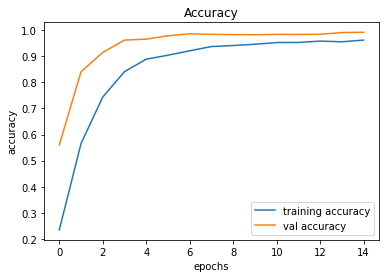

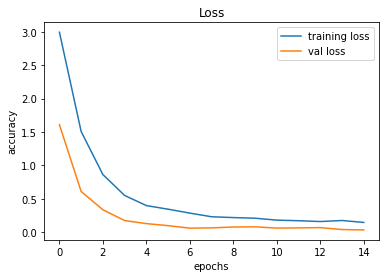

In [11]:
plt.figure(0)
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

In [16]:
y_test_data = pd.read_csv(os.path.join("archive", "Test.csv"))

### Accuracy score on unseen data (95,32%)

In [ ]:
labels_test = y_test_data['ClassId'].values
test_images = y_test_data['Path'].values

data_test = []
valid_test_images = [".png"]

path_test = os.path.join('archive', 'Test')
images_test = os.listdir(path)
for img_test in test_images:
        try:
            ext = os.path.splitext(image)[1]
            if ext.lower() not in valid_test_images:
                continue
            foto_test = Image.open(os.path.join(path,image))
            foto_test = foto.resize(RESIZE)
            foto_test = np.array(foto)
            data_test.append(np.array(foto_test))
        except:
            print("Can't open image")

data_test = np.array(data_test)

predictions = model.predict(data_test)

# Accuracy

accuracy_score(labels_test, predictions)